# Step 2 - Feature Engineering

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import Imputer

def feature_engineering(_df, get_dummies=False):
    
    imputer_age = Imputer(missing_values='NaN', strategy='mean', axis=0)
    
    imputer_age.fit(_df[['Age']])
    
    _df['Title_'] = _df['Name'].apply(lambda x: x.replace('.',',').split(',')[1].strip())
    
    _df['Fare_'] = _df['Fare'].fillna(10)
    _df['Fare_'] = _df['Fare'].apply(lambda x: 40 if x > 40 else x)
    _df['HasFare'] = _df['Fare_'].apply(lambda x: 0 if np.isnan(x) else 1)

    _df['SibSp_'] = _df['SibSp'].apply(lambda x: 3 if x > 3 else x)
    _df['Parch_'] = _df['Parch'].apply(lambda x: 3 if x > 3 else x)
    
    
    # Age
    _df['HasAge'] = _df['Age'].apply(lambda x: 0 if np.isnan(x) else 1)
    #_df['Age_'] = _df['Age'].fillna(29)
    
    
    _df['Age_'] = imputer_age.transform(_df['Age'].reshape(-1, 1))
    
    # or
    #_df['Age_'] = _df["Age"].fillna(_df["Age"].mean())
    # http://stackoverflow.com/questions/21050426/pandas-impute-nans
    
    _df['Age_b'] = np.digitize(_df['Age_'], [0,5,10,15,20,25,28,30,35,40,45,50,55,60,65,70])

    _df['Title_'] = _df['Name'].apply(lambda x: x.replace('.',',').split(',')[1].strip())

    # Cabin:
    _df['Cabin_'] = _df['Cabin'].apply(lambda x: np.NaN if isinstance(x, float) else x[0]) # NaN is no problem for get_dummies
    
    df_return = _df[['Age_','Age_b','HasAge','Sex','Pclass','Fare_','HasFare','Title_','Embarked','Cabin_','SibSp_','Parch_']]

    
    if get_dummies:
        return pd.get_dummies(df_return)
    else:
        return df_return

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 28 days


In [2]:

import pylab as plt
%matplotlib inline
import numpy as np
import math

df=pd.read_csv('data/train.csv', sep=',')

df_ = feature_engineering(df)

In [14]:
df_.head()

,Age_,Age_b,HasAge,Pclass,Fare_,HasFare,SibSp_,Parch_,Sex_female,Sex_male,...,Embarked_Q,Embarked_S,Cabin__A,Cabin__B,Cabin__C,Cabin__D,Cabin__E,Cabin__F,Cabin__G,Cabin__T
0,22,5,1,3,7.250,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,38,9,1,1,40.000,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,26,6,1,3,7.925,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,35,9,1,1,40.000,1,1,0,1,0,...,0,1,0,0,1,0,0,0,0,0
4,35,9,1,3,8.050,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


(array([  54.,   46.,  177.,  346.,  118.,   70.,   45.,   24.,    9.,    2.]),
 array([  0.42 ,   8.378,  16.336,  24.294,  32.252,  40.21 ,  48.168,
         56.126,  64.084,  72.042,  80.   ]),
 <a list of 10 Patch objects>)

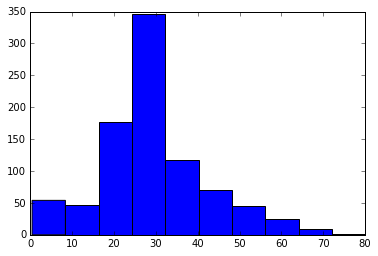

In [4]:
plt.hist(df['Age_'])

In [5]:
df_ = feature_engineering(df,get_dummies=True)

In [6]:
print df_.columns

Index([u'Age_', u'Age_b', u'HasAge', u'Pclass', u'Fare_', u'HasFare',
       u'SibSp_', u'Parch_', u'Sex_female', u'Sex_male', u'Title__Capt',
       u'Title__Col', u'Title__Don', u'Title__Dr', u'Title__Jonkheer',
       u'Title__Lady', u'Title__Major', u'Title__Master', u'Title__Miss',
       u'Title__Mlle', u'Title__Mme', u'Title__Mr', u'Title__Mrs',
       u'Title__Ms', u'Title__Rev', u'Title__Sir', u'Title__the Countess',
       u'Embarked_C', u'Embarked_Q', u'Embarked_S', u'Cabin__A', u'Cabin__B',
       u'Cabin__C', u'Cabin__D', u'Cabin__E', u'Cabin__F', u'Cabin__G',
       u'Cabin__T'],
      dtype='object')


In [15]:
df_.head()

,Age_,Age_b,HasAge,Pclass,Fare_,HasFare,SibSp_,Parch_,Sex_female,Sex_male,...,Embarked_Q,Embarked_S,Cabin__A,Cabin__B,Cabin__C,Cabin__D,Cabin__E,Cabin__F,Cabin__G,Cabin__T
0,22,5,1,3,7.250,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,38,9,1,1,40.000,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,26,6,1,3,7.925,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,35,9,1,1,40.000,1,1,0,1,0,...,0,1,0,0,1,0,0,0,0,0
4,35,9,1,3,8.050,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


## Remeber Feature Scaler - both on train and on test:

In [8]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()

X_train_std = stdsc.fit_transform(df_)

# X_test_std = std.transform(test_df)

In [9]:
X_train_std[0]

array([-0.5924806 , -0.68661155,  0.49789473,  0.82737724, -0.97149905,
        0.        ,  0.69538815, -0.50678655, -0.73769513,  0.73769513,
       -0.03352008, -0.0474312 , -0.03352008, -0.08898625, -0.03352008,
       -0.03352008, -0.0474312 , -0.21680296, -0.50665528, -0.0474312 ,
       -0.03352008,  0.85053175, -0.4039621 , -0.03352008, -0.0823387 ,
       -0.03352008, -0.03352008, -0.48204268, -0.30756234,  0.61930636,
       -0.13085598, -0.23598136, -0.26629582, -0.19611614, -0.19300938,
       -0.12168146, -0.06715343, -0.03352008])

In [10]:
X_train_std[1]

array([ 0.63878901,  0.65352183,  0.49789473, -1.56610693,  1.55704733,
        0.        ,  0.69538815, -0.50678655,  1.35557354, -1.35557354,
       -0.03352008, -0.0474312 , -0.03352008, -0.08898625, -0.03352008,
       -0.03352008, -0.0474312 , -0.21680296, -0.50665528, -0.0474312 ,
       -0.03352008, -1.17573506,  2.47547975, -0.03352008, -0.0823387 ,
       -0.03352008, -0.03352008,  2.0745051 , -0.30756234, -1.61470971,
       -0.13085598, -0.23598136,  3.75522235, -0.19611614, -0.19300938,
       -0.12168146, -0.06715343, -0.03352008])

In [11]:
X_train_std[6]

array([ 1.87005862,  1.65862187,  0.49789473, -1.56610693,  1.55704733,
        0.        , -0.57426522, -0.50678655, -0.73769513,  0.73769513,
       -0.03352008, -0.0474312 , -0.03352008, -0.08898625, -0.03352008,
       -0.03352008, -0.0474312 , -0.21680296, -0.50665528, -0.0474312 ,
       -0.03352008,  0.85053175, -0.4039621 , -0.03352008, -0.0823387 ,
       -0.03352008, -0.03352008, -0.48204268, -0.30756234,  0.61930636,
       -0.13085598, -0.23598136, -0.26629582, -0.19611614,  5.18109544,
       -0.12168146, -0.06715343, -0.03352008])

In [12]:
print df_.columns

Index([u'Age_', u'Age_b', u'HasAge', u'Pclass', u'Fare_', u'HasFare',
       u'SibSp_', u'Parch_', u'Sex_female', u'Sex_male', u'Title__Capt',
       u'Title__Col', u'Title__Don', u'Title__Dr', u'Title__Jonkheer',
       u'Title__Lady', u'Title__Major', u'Title__Master', u'Title__Miss',
       u'Title__Mlle', u'Title__Mme', u'Title__Mr', u'Title__Mrs',
       u'Title__Ms', u'Title__Rev', u'Title__Sir', u'Title__the Countess',
       u'Embarked_C', u'Embarked_Q', u'Embarked_S', u'Cabin__A', u'Cabin__B',
       u'Cabin__C', u'Cabin__D', u'Cabin__E', u'Cabin__F', u'Cabin__G',
       u'Cabin__T'],
      dtype='object')


Age_


(array([  54.,   46.,  177.,  346.,  118.,   70.,   45.,   24.,    9.,    2.]),
 array([-2.25315549, -1.64075277, -1.02835004, -0.41594732,  0.1964554 ,
         0.80885813,  1.42126085,  2.03366357,  2.6460663 ,  3.25846902,
         3.87087174]),
 <a list of 10 Patch objects>)

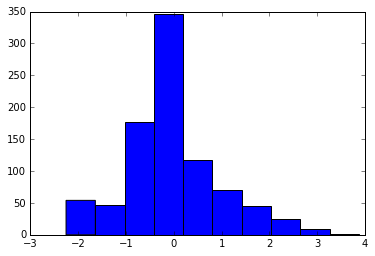

In [13]:
n=0
print df_.columns[n]
plt.hist(X_train_std[:,n])